In [41]:
import pickle
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import sys,os

import src.visualizations
import src.constants as constants
from src.targets import targets

In [42]:
# Set parameters
constants.HISTORY_LENGTH=1
GRID_SIZE = 50
constants.GRID_SIZE=GRID_SIZE
TARGET = targets(GRID_SIZE)['square']
ITERATIONS = 100

In [43]:
filename = 'data/exp3_upscale//error_phase1_error_phase2/error_phase1_error_phase2_square50_1500gens_400ps_100i_k1_N4_run14.p'

# with open(filename, 'rb') as f:
#     best,stats = pickle.load(f)

with open(filename, 'rb') as f:
    stuff = pickle.load(f)
    best = stuff[3]

In [44]:
# save filenames 
image_filename = 'results/exp3_upscale/'+filename.split('/')[-1].split('.')[0]+'.png'
video_filename = 'results/exp3_upscale/'+filename.split('/')[-1].split('.')[0]+'.mp4'

In [45]:
# Run NCA as in training
train_history = best.playback(iterations=ITERATIONS)

# Initial state
init_grid = train_history[0]

# Final state
final_state = train_history[-1]

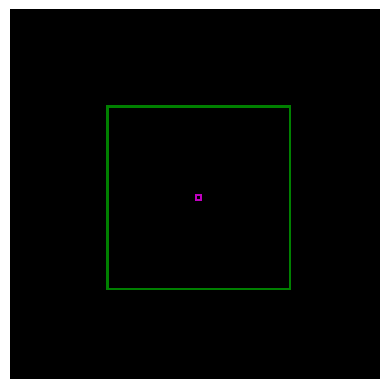

In [46]:
# Visualize initial condition
visualizations.display_body_signal(init_grid, target=TARGET, original_size=GRID_SIZE)
# visualizations.display_body_signal(init_grid, target=TARGET, original_size=GRID_SIZE, save=True, fn='results/exp3_upscale/square50_IC.png')


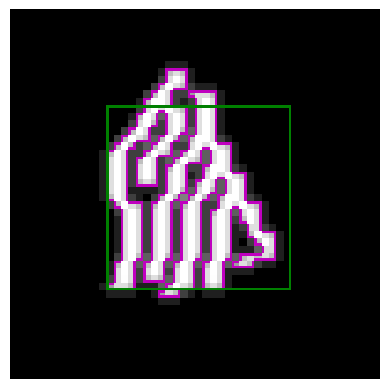

Loss: 0.1826352941176471
Empowerment (k=1): 0.3055091069948095


In [47]:
# Visualize final grid state of the NCA
visualizations.display_body_signal(final_state, target=TARGET, original_size=GRID_SIZE, save=True, fn=image_filename)

# Print loss and empowerment
best.evaluate(['error','MI'], TARGET,g=2000)
print('Loss:', best.get_objective('error'))
print('Empowerment (k={}):'.format(constants.HISTORY_LENGTH), best.get_objective('MI')*-1)

In [48]:
# visualizations.save_movie(train_history, video_filename, original_size=GRID_SIZE)